In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load

In [39]:
base = pd.read_csv("./data.csv")

In [40]:
base.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [41]:
base.describe(include="all")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


# Tratamento

In [42]:
class MultiColumnLabelEncoder():
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [43]:
mle = MultiColumnLabelEncoder(["city"])

In [44]:
base_2 = mle.fit_transform(base)
base_2 = base_2.drop(["street", "statezip", "country"], 1)

In [45]:
base_2.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city               int32
dtype: object

In [46]:
base_2.date = pd.to_datetime(base_2.date)

In [47]:
base_2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31


# Exploratório

In [52]:
base_2.shape

(4600, 15)

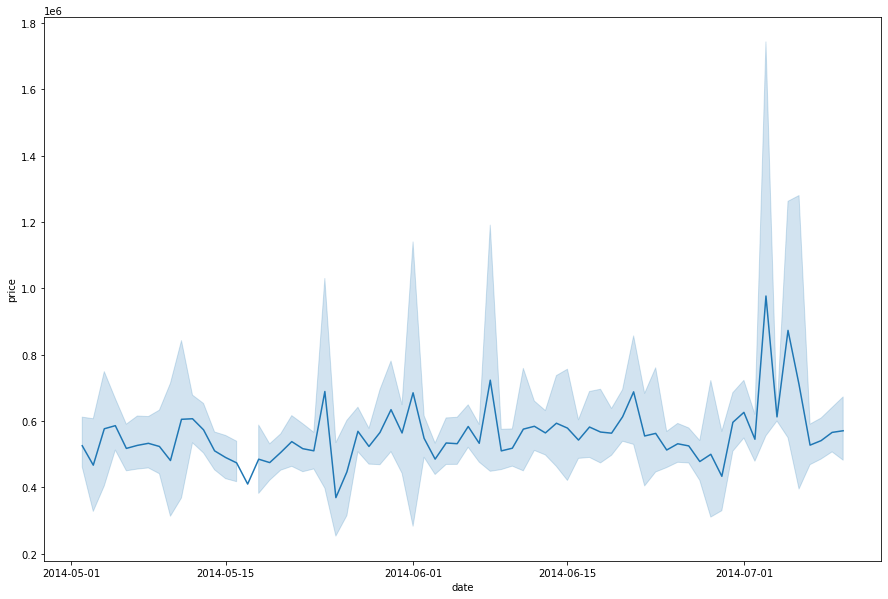

In [48]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="date", y="price", data=base_3)

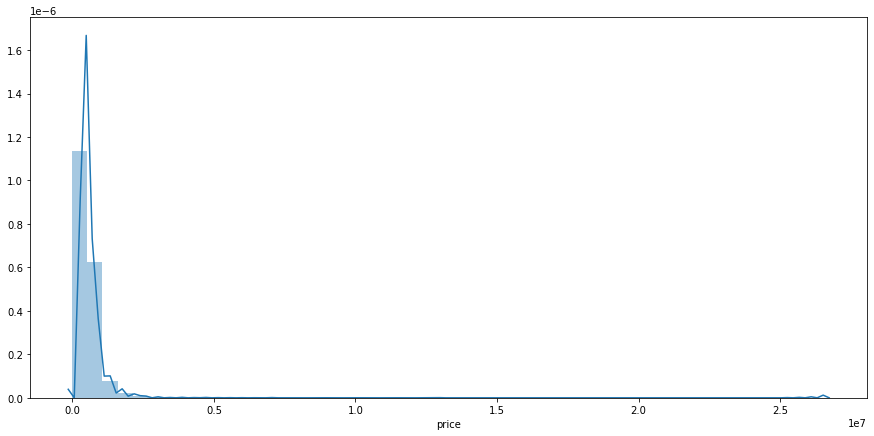

In [61]:
plt.figure(figsize=(15, 7))
sns.distplot(a=base_2["price"])

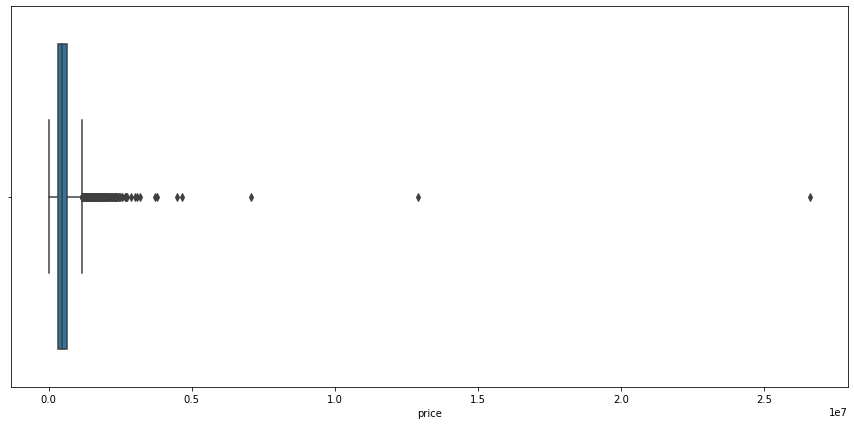

In [63]:
plt.figure(figsize=(15, 7))
sns.boxplot(base_2["price"])

In [65]:
max(base_2.price)

26590000.0

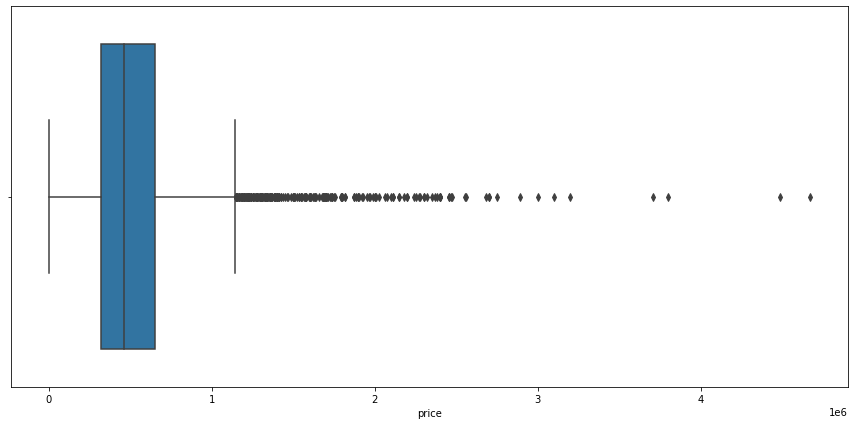

In [71]:
plt.figure(figsize=(15, 7))
sns.boxplot(base_2.query("price < 5000000")["price"])

# Feature Selection

In [73]:
base_3 = base_2.query("price < 5000000")

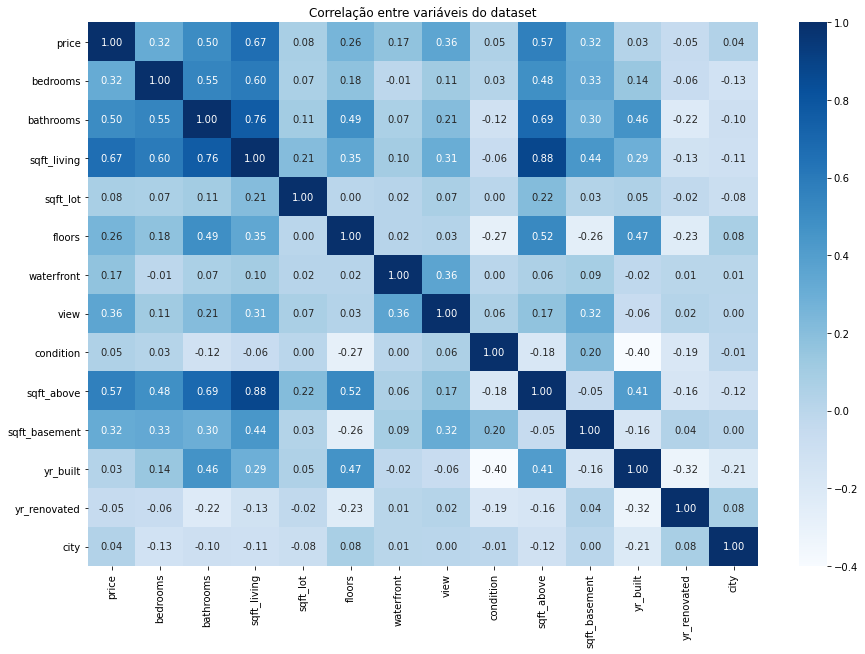

In [74]:
plt.figure(figsize=(15, 10))

sns.heatmap(
    base_3.corr(),
    annot = True,
    fmt = '.2f',
    cmap='Blues'
)

plt.title('Correlação entre variáveis do dataset')

plt.show()

In [75]:
import numpy as np
features = (
    np.abs(base_3.corr()[["price"]])
    .sort_values(by="price", ascending=False)
    .reset_index()
    .rename(columns={"index":"feature"})
    .query("feature != 'price'")
)

features

,feature,price
1,sqft_living,0.666064
2,sqft_above,0.569511
3,bathrooms,0.504127
4,view,0.358538
5,sqft_basement,0.320152
6,bedrooms,0.319129
7,floors,0.257352
8,waterfront,0.171731
9,sqft_lot,0.080860
10,condition,0.049863


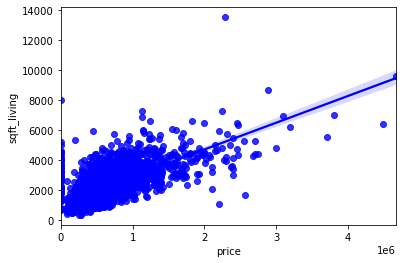

In [81]:
sns.regplot(x=base_3["price"], y=base_3["sqft_living"], color='Blue')

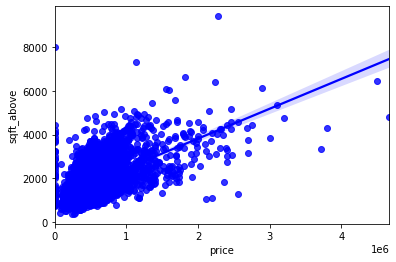

In [79]:
sns.regplot(x=base_3["price"], y=base_3["sqft_above"], color='Blue')

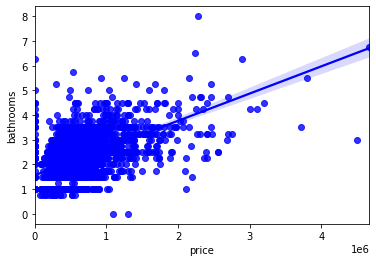

In [82]:
sns.regplot(x=base_3["price"], y=base_3["bathrooms"], color='Blue')

# Linear Regression

In [98]:
X = base_3[["sqft_living", "sqft_above", "bathrooms"]]
y = base_3["price"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y , shuffle=True, test_size=0.25, random_state=42)

In [100]:
lr = LinearRegression()

In [101]:
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred = lr.predict(X_test)

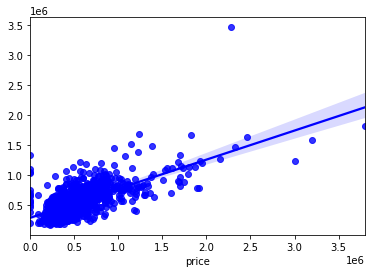

In [103]:
sns.regplot(y_test, y_pred, color='Blue')

In [104]:
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

66040024155.63594

In [105]:
RMSE= np.sqrt(MSE)
RMSE

256982.53667445175

In [109]:
MAE = np.mean(np.abs(y_test - y_pred))
MAE

174759.92321065822

In [ ]:
L